In [1]:
import matplotlib.pyplot as plt
from skimage import io

import numpy as np
from skimage.filters import threshold_otsu
import cv2

img = io.imread("texture.png", as_gray=True)

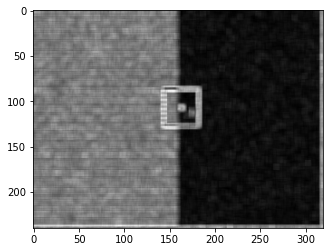

In [2]:
##################################################
#Variance - not a great way to quantify texture


from scipy import ndimage 
k=7
img_mean = ndimage.uniform_filter(img, (k, k))
img_sqr_mean = ndimage.uniform_filter(img**2, (k, k))
img_var = img_sqr_mean - img_mean**2
plt.imshow(img_var, cmap='gray')

# GABOR Convolutional Kernel

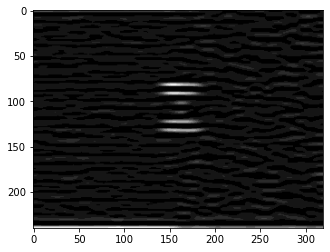

In [3]:
#######################################################
#GABOR - A great filter for texture but usually efficient

# Not much useful for just a single image as we dont know what parameters to set manually
#if we know exact parameters. Good choice for generating features for machine learning

# If we use this kernel, given that we have many images as our dataset, we can get pretty good parameters
# by training a ML/DL model

ksize=45
theta=np.pi/2
kernel = cv2.getGaborKernel((ksize, ksize), 5.0, theta, 10.0, 0.9, 0, ktype=cv2.CV_32F)
filtered_image = cv2.filter2D(img, cv2.CV_8UC3, kernel)
plt.imshow(filtered_image, cmap='gray')





/opt/tljh/user/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3417: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


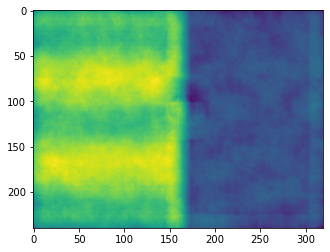

In [4]:
###########################################################
#Entropy
#Entropy quantifies disorder.
#Since cell region has high variation in pixel values the entropy would be
#higher compared to scratch region

from skimage.filters.rank import entropy
from skimage.morphology import disk
entropy_img = entropy(img, disk(15))
plt.imshow(entropy_img) 

### Now, we perform OTSU segmentation on top of ENTROPY calculation: A 2 step segmentation results in a GOOD output especially in images where we face texture related problems

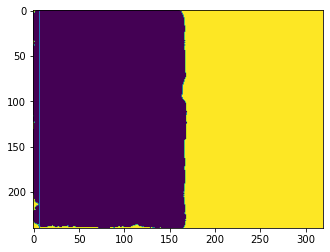

In [5]:
#use otsu to threshold high vs low entropy regions.
plt.hist(entropy_img.flat, bins=100, range=(0,7))  #.flat returns the flattened numpy array (1D)

thresh = threshold_otsu(entropy_img) 

#binarize the entropy image 
binary = entropy_img <= thresh
plt.imshow(binary)

In [6]:
#Sum all pixels in the scratch region (values =1)
scratch_area = np.sum(binary == 1)
print("Scratched area is: ", scratch_area, "Square pixels")

scale = 0.45 # microns/pixel
print("Scratched area in sq. microns is: ", scratch_area*((scale)**2), "Square pixels")

Scratched area is:  36860 Square pixels
Scratched area in sq. microns is:  7464.150000000001 Square pixels
